In [46]:
from sklearn.decomposition import PCA, FastICA, KernelPCA, randomized_svd
from utility3 import load_data, decomp_exp, cluster_plots1
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
import matplotlib.colors
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
import time
import os
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score, adjusted_rand_score, cohen_kappa_score
import matplotlib.colors as colors
from sklearn.metrics import mutual_info_score

color_list = ['red', 'darkorange', 'gold', 'lawngreen', 'darkgreen', 'blue', 'purple', 'indigo']
mycmap = colors.ListedColormap(color_list)
boundaries = range(8)#[0.5*2*i for i in range(8)]

In [4]:
X_train_m, X_val_m, X_test_m, y_train_m, y_val_m, y_test_m, class_names_m = load_data('motions', scale=True, valset=True)
X_train_p, X_val_p, X_test_p, y_train_p, y_val_p, y_test_p, class_names_p = load_data('particles', scale=True, valset=True)

motions shapes: (11678, 64), (11678, 1)


particles shapes: (15233, 7), (15233, 1)


9748

In [145]:
model_type = 'pca'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = range(64)
other_params = {} #{'n_clusters':4}
result = defaultdict(list)
for param in param_range:
    model = PCA(n_components=param)
    fitted = model.fit(X_train_m)
    result['components'].append(model.components_)
    result['score, train, m'].append(model.score(X_train_m))
    result['score, val, m'].append(model.score(X_val_m))

result['explained variance ratio'] = model.explained_variance_ratio_
result['explained variance'] = model.explained_variance_
result['param_range'] = param_range
result['param_name'] = param_name
result['model_type'] = model_type

pca_result_m = result
np.save('pca_result_m', pca_result_m)

In [140]:
model_type = 'pca'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = range(X_train_p.shape[1])
other_params = {} #{'n_clusters':4}
result = defaultdict(list)
for param in param_range:
    model = PCA(n_components=param)
    X = model.fit(X_train_p)
    result['components'].append(model.components_)
    result['score, train, p'].append(model.score(X_train_p))
    result['score, val, p'].append(model.score(X_val_p))

result['explained variance ratio']=model.explained_variance_ratio_
result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type

pca_result_p = result
np.save('pca_result_p', pca_result_p)

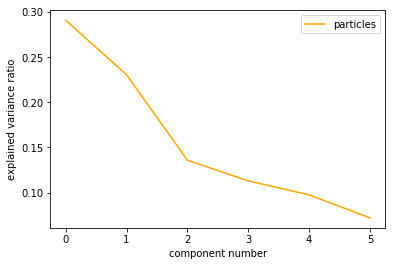

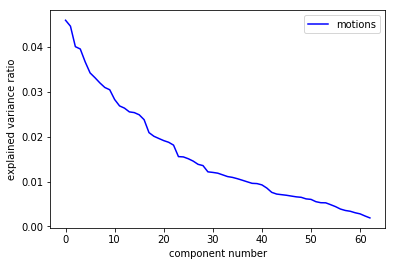

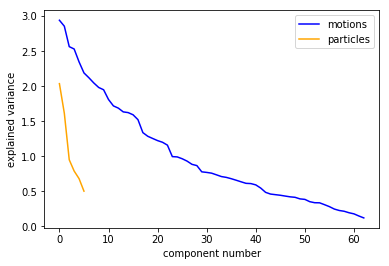

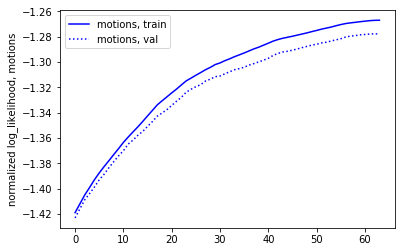

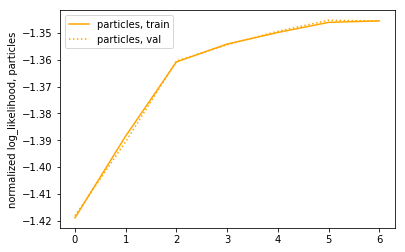

In [258]:
# Explained Variance Ratio

result_m = pca_result_m
result_p = pca_result_p

#plt.plot(range(len(result_m['explained variance ratio'])), np.array(result_m['explained variance ratio'])*64, color='blue', label="motions")
plt.plot(range(len(result_p['explained variance ratio'])), np.array(result_p['explained variance ratio']), color='orange', label="particles")
plt.ylabel('explained variance ratio')
plt.xlabel('component number')
plt.legend()
plt.show()

plt.plot(range(len(result_m['explained variance ratio'])), np.array(result_m['explained variance ratio']), color='blue', label="motions")
#plt.plot(range(len(result_p['explained variance ratio'])), np.array(result_p['explained variance ratio'])*7, color='orange', label="particles")
plt.ylabel('explained variance ratio')
plt.xlabel('component number')
plt.legend()
plt.show()


# Explained Variance

plt.plot(range(len(result_m['explained variance'])), result_m['explained variance'], color='blue', label="motions")
plt.plot(range(len(result_p['explained variance'])), result_p['explained variance'], color='orange', label="particles")
plt.ylabel('explained variance')
plt.xlabel('component number')
plt.legend()
plt.show()

# Log Likelihood Score

plt.plot(result_m['param_range'], np.array(result_m['score, train, m'])/X_train_m.shape[1], label="motions, train", color='blue', linestyle="-")
plt.plot(result_m['param_range'], np.array(result_m['score, val, m'])/X_train_m.shape[1], label="motions, val", color="blue", linestyle=":")
plt.ylabel('normalized log_likelihood, motions')
plt.legend()
plt.show()

plt.plot(result_p['param_range'], np.array(result_p['score, train, p'])/X_train_p.shape[1], label="particles, train", color='orange', linestyle="-")
plt.plot(result_p['param_range'], np.array(result_p['score, val, p'])/X_train_p.shape[1], label="particles, val", color="orange", linestyle=":")
plt.ylabel('normalized log_likelihood, particles')
plt.legend()
plt.show()

In [149]:
pca_m = PCA(n_components=23)
pca_p = PCA(n_components=2)
X_pca_m = pca_m.fit_transform(X_train_m)
X_pca_p = pca_p.fit_transform(X_train_p)

print(X_pca_m.shape)
print(X_pca_p.shape)

X_val_pca_m = pca_m.transform(X_val_m)
X_val_pca_p = pca_p.transform(X_val_p)

pca_m_data = [X_pca_m, X_val_pca_m, pca_m]
pca_p_data = [X_pca_p, X_val_pca_p, pca_p]

np.save('pca_m_data', pca_m_data)
np.save('pca_p_data', pca_p_data)

(7473, 23)
(9748, 2)


In [191]:
pca2_m = PCA(n_components=64)
pca2_p = PCA(n_components=7)
X_pca2_m = pca2_m.fit_transform(X_train_m)
X_pca2_p = pca2_p.fit_transform(X_train_p)

print(X_pca2_m.shape)
print(X_pca2_p.shape)

X_val_pca2_m = pca2_m.transform(X_val_m)
X_val_pca2_p = pca2_p.transform(X_val_p)

pca2_m_data = [X_pca2_m, X_val_pca2_m, pca2_m]
pca2_p_data = [X_pca2_p, X_val_pca2_p, pca2_p]

np.save('pca2_m_data', pca2_m_data)
np.save('pca2_p_data', pca2_p_data)

(7473, 64)
(9748, 7)


In [78]:

model_type = 'ica'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = range(1, 64)
other_params = {}#{'n_components':4}
result = defaultdict(list)
for param in param_range:
    model = FastICA(n_components=param)
    fitted = model.fit_transform(X_train_m)
    result['kurtosis, ica'].append(kurtosis(fitted, axis=0, fisher=True))
    result['total kurtosis, ica'].append(kurtosis(fitted, axis=None, fisher=True))
    result['params'].append(model.get_params())

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type
result['kurtosis, train']=kurtosis(X_train_m, axis=0, fisher=True)
result['total kurtosis, train']=kurtosis(X_train_m, axis=None, fisher=True)
ica_result_m = result


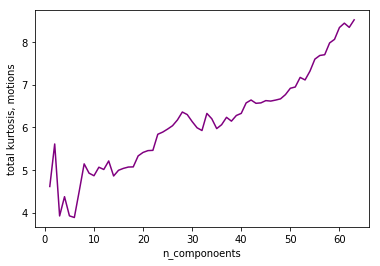

In [80]:
plt.plot(ica_result_m['param_range'], ica_result_m['total kurtosis, ica'], color='purple')
plt.ylabel('total kurtosis, motions')
plt.xlabel('n_components')
plt.show()

In [103]:

model_type = 'ica'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = range(1, 7)
other_params = {'max_iter':5000}#{'n_components':4}
result = defaultdict(list)
for param in param_range:
    model = FastICA(n_components=param)
    fitted = model.fit_transform(X_train_p)
    result['kurtosis, ica'].append(kurtosis(fitted, axis=0, fisher=True))
    result['total kurtosis, ica'].append(kurtosis(fitted, axis=None, fisher=True))
    result['params'].append(model.get_params())

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type
result['kurtosis, train']=kurtosis(X_train_p, axis=0, fisher=True)
result['total kurtosis, train']=kurtosis(X_train_p, axis=None, fisher=True)
ica_result_p = result

C:\Users\eking\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


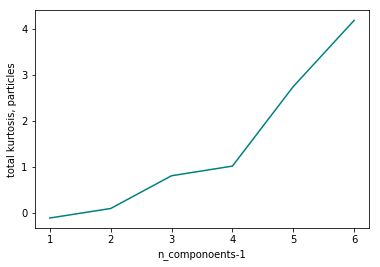

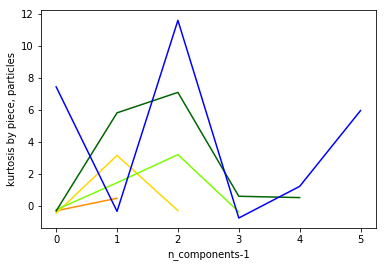

In [107]:
plt.plot(ica_result_p['param_range'], ica_result_p['total kurtosis, ica'], color='teal')
plt.ylabel('total kurtosis, particles')
plt.xlabel('n_componoents-1')
plt.show()

i = 0
for ica_result in ica_result_p['kurtosis, ica']:
    plt.plot(range(len(ica_result)), ica_result, 
             color=color_list[i], 
             label='feature {}'.format(i))
    i = i + 1
plt.ylabel('kurtosis by piece, particles')
plt.xlabel('n_components-1')
plt.show()

In [152]:

model_type = 'ica'       #'kmeans' or 'gaussian mixture'
param_name = 'fun'   #we need to use proper names now... 
param_range = ['logcosh', 'exp', 'cube']
other_params = {'n_components':7} #{'n_components':4}
result = defaultdict(list)
for param in param_range:
    params = {param_name: param}
    model = FastICA(**params, **other_params)
    fitted = model.fit_transform(X_train_p)
    result['kurtosis, ica'].append(kurtosis(fitted, axis=0, fisher=True))
    result['total kurtosis, ica'].append(kurtosis(fitted, axis=None, fisher=True))
    result['params'].append(model.get_params())

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type
result['kurtosis, train']=kurtosis(X_train_p, axis=0, fisher=True)
result['total kurtosis, train']=kurtosis(X_train_p, axis=None, fisher=True)
ica_result_p2 = result
np.save('ica_result_p2', ica_result_p2)

C:\Users\eking\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [153]:

model_type = 'ica'       #'kmeans' or 'gaussian mixture'
param_name = 'fun'   #we need to use proper names now... 
param_range = ['logcosh', 'exp', 'cube']
other_params = {'n_components':64} #{'n_components':4}
result = defaultdict(list)
for param in param_range:
    params = {param_name: param}
    model = FastICA(**params, **other_params)
    fitted = model.fit_transform(X_train_m)
    result['kurtosis, ica'].append(kurtosis(fitted, axis=0, fisher=True))
    result['total kurtosis, ica'].append(kurtosis(fitted, axis=None, fisher=True))
    result['params'].append(model.get_params())

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type
result['kurtosis, train']=kurtosis(X_train_m, axis=0, fisher=True)
result['total kurtosis, train']=kurtosis(X_train_m, axis=None, fisher=True)
ica_result_m2 = result
np.save('ica_result_m2', ica_result_m2)

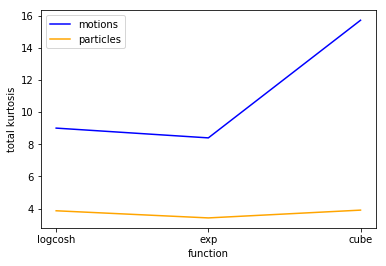

[9.006976813976472, 8.399151668250763, 15.719520781996405]
[3.8631453769710262, 3.4186100845320713, 3.9035596450434333]


In [158]:
plot_result1 = ica_result_m2
plot_result2 = ica_result_p2

plt.plot(plot_result1['param_range'], plot_result1['total kurtosis, ica'], color='blue', label='motions')
plt.plot(plot_result2['param_range'], plot_result2['total kurtosis, ica'], color='orange', label='particles')
plt.ylabel('total kurtosis')
plt.xlabel('function')
plt.legend()
plt.show()

print(plot_result1['total kurtosis, ica'])
print(plot_result2['total kurtosis, ica'])

In [156]:

model_type = 'ica'       #'kmeans' or 'gaussian mixture'
param_name = 'algorithm'   #we need to use proper names now... 
param_range = ['parallel', 'deflation']
other_params = {'n_components':64, 'fun': 'cube'} #{'n_components':4}
result = defaultdict(list)
for param in param_range:
    params = {param_name: param}
    model = FastICA(**params, **other_params)
    fitted = model.fit_transform(X_train_m)
    result['kurtosis, ica'].append(kurtosis(fitted, axis=0, fisher=True))
    result['total kurtosis, ica'].append(kurtosis(fitted, axis=None, fisher=True))
    result['params'].append(model.get_params())

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type
result['kurtosis, train']=kurtosis(X_train_m, axis=0, fisher=True)
result['total kurtosis, train']=kurtosis(X_train_m, axis=None, fisher=True)
ica_result_m3 = result
np.save('ica_result_m3', ica_result_m3)

In [157]:

model_type = 'ica'       #'kmeans' or 'gaussian mixture'
param_name = 'algorithm'   #we need to use proper names now... 
param_range = ['parallel', 'deflation']
other_params = {'n_components':7, 'fun': 'cube'} #{'n_components':4}
result = defaultdict(list)
for param in param_range:
    params = {param_name: param}
    model = FastICA(**params, **other_params)
    fitted = model.fit_transform(X_train_p)
    result['kurtosis, ica'].append(kurtosis(fitted, axis=0, fisher=True))
    result['total kurtosis, ica'].append(kurtosis(fitted, axis=None, fisher=True))
    result['params'].append(model.get_params())

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type
result['kurtosis, train']=kurtosis(X_train_p, axis=0, fisher=True)
result['total kurtosis, train']=kurtosis(X_train_p, axis=None, fisher=True)
ica_result_p3 = result
np.save('ica_result_p3', ica_result_p3)

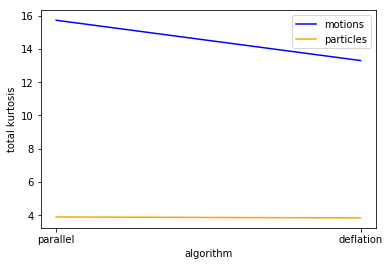

[15.72324551420169, 13.302770415885607]
[3.9029377908954697, 3.846120481559903]


In [159]:
plot_result1 = ica_result_m3
plot_result2 = ica_result_p3

plt.plot(plot_result1['param_range'], plot_result1['total kurtosis, ica'], color='blue', label='motions')
plt.plot(plot_result2['param_range'], plot_result2['total kurtosis, ica'], color='orange', label='particles')
plt.ylabel('total kurtosis')
plt.xlabel('algorithm')
plt.legend()
plt.show()

print(plot_result1['total kurtosis, ica'])
print(plot_result2['total kurtosis, ica'])

In [162]:
ica_m = FastICA(n_components=64, fun='cube')
ica_p = FastICA(n_components=7, fun='cube')

X_ica_m = ica_m.fit_transform(X_train_m)
X_ica_p = ica_p.fit_transform(X_train_p)
X_val_ica_m = ica_m.transform(X_val_m)
X_val_ica_p = ica_p.transform(X_val_p)

ica_m_data = [X_ica_m, X_val_ica_m, ica_m]
ica_p_data = [X_ica_p, X_val_ica_p, ica_p]

np.save('ica_m_data', ica_m_data)
np.save('ica_p_data', ica_p_data)

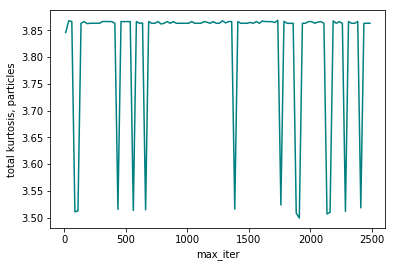

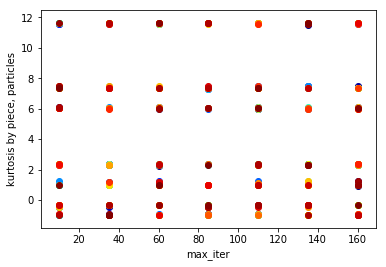

In [127]:
plot_result = ica_result_p2

plt.plot(plot_result['param_range'], plot_result['total kurtosis, ica'], color='teal')
plt.ylabel('total kurtosis, particles')
plt.xlabel('max_iter')
plt.show()

color_idx4 = np.linspace(0, 1, len(plot_result['param_range']))
i = 0
for ica_result in plot_result['kurtosis, ica']:
    plt.scatter(plot_result['param_range'][:len(ica_result)], ica_result, 
             color=plt.cm.jet(color_idx4[i]), 
             label='feature {}'.format(i))
    i = i + 1
plt.ylabel('kurtosis by piece, particles')
plt.xlabel('max_iter')
plt.show()

In [9]:
model=FastICA()
X_ica_m=model.fit_transform(X_train_m)
x = kurtosis(X_train_m, axis=0)
y = kurtosis(X_ica_m, axis=0)

In [60]:


color_list = ['red', 'darkorange','gold', 'lawngreen', 'darkgreen', 'blue', 'purple','indigo']
mycmap = colors.ListedColormap(color_list)
boundaries = range(8)#[0.5*2*i for i in range(8)]

plt.scatter(x, y, c=[i % 8 for i in range(64)], cmap=mycmap)
plt.xlabel('training set kurtosis')
plt.ylabel('ica set kurtosis')
plt.ylim(0, 30)
plt.xlim(0, 30)
plt.colorbar()
plt.show()

NameError: name 'x' is not defined

In [112]:

model_type = 'ica'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = range(1) #range(64)
other_params = {} #{'n_clusters':4}
result = defaultdict(list)
for param in param_range:
    model = FastICA()
    fitted = model.fit(X_train_p)
    result['components'].append(model.components_)
    #result['score, train, m'].append(model.score(X_train_m))
    #result['score, val, m'].append(model.score(X_val_m))

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type

ica_result_p = result


working on param = 1


working on param = 2


working on param = 3


working on param = 4


working on param = 5


working on param = 6


working on param = 7


working on param = 8


working on param = 9


working on param = 10


working on param = 11


working on param = 12


working on param = 13


working on param = 14


working on param = 15


working on param = 16


working on param = 17


working on param = 18


working on param = 19


working on param = 20


working on param = 21


working on param = 22


working on param = 23


working on param = 24


working on param = 25


working on param = 26


working on param = 27


working on param = 28


working on param = 29


working on param = 30


working on param = 31


working on param = 32


working on param = 33


working on param = 34


working on param = 35


working on param = 36


working on param = 37


working on param = 38


working on param = 39


working on param = 40


working on param = 41


working on param = 42


working on param = 43


working on param = 44


working on param = 45


working on param = 46


working on param = 47


working on param = 48


working on param = 49


working on param = 50


working on param = 51


working on param = 52


working on param = 53


working on param = 54


working on param = 55


working on param = 56


working on param = 57


working on param = 58


working on param = 59


working on param = 60


working on param = 61


working on param = 62


working on param = 63


working on param = 64


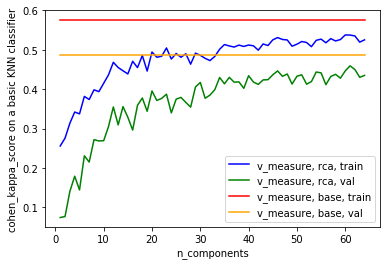

In [47]:
from sklearn.neighbors import KNeighborsClassifier

model_type = 'random projection'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = [i+1 for i in range(64)]
other_params = {} #{'n_clusters':4}
result = defaultdict(list)
for param in param_range:
    params={param_name:param}
    rca_model = GaussianRandomProjection(**params, **other_params)
    fitted = model.fit(X_train_m)
    result['components'].append(model.components_)
    result['n_components'].append(model.n_components_)
    result['model params'].append(model.get_params())
    
    rca_model.fit(X_train_m)
    X_train_rca = rca_model.transform(X_train_m)
    X_val_rca = rca_model.transform(X_val_m)
    #assess accuracy
    knn = KNeighborsClassifier(n_neighbors=10)
    knn_base = KNeighborsClassifier(n_neighbors=10)
    knn_base.fit(X_train_m, y_train_m)
    knn.fit(X_train_rca, y_train_m)
    y_train_base_pred = knn_base.predict(X_train_m)
    y_val_base_pred = knn_base.predict(X_val_m)
    y_train_pred = knn.predict(X_train_rca)
    y_val_pred = knn.predict(X_val_rca)
    print("working on param = {}".format(param))
    result['v_measure, train, m'].append(cohen_kappa_score(y_train_pred, y_train_m))
    result['v_measure, val, m'].append(cohen_kappa_score(y_val_pred, y_val_m))
    result['v_measure, base, train, m'].append(cohen_kappa_score(y_train_base_pred, y_train_m))
    result['v_measure, base, val, m'].append(cohen_kappa_score(y_val_base_pred, y_val_m))
    #result['score, train, m'].append(model.score(X_train_m))
    #result['score, val, m'].append(model.score(X_val_m))

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type

rca_result_m = result


plt.plot(result['param_range'], result['v_measure, train, m'], color="blue", label="v_measure, rca, train")
plt.plot(result['param_range'], result['v_measure, val, m'], color="green", label="v_measure, rca, val")
plt.plot(result['param_range'], result['v_measure, base, train, m'], color="red", label="v_measure, base, train")
plt.plot(result['param_range'], result['v_measure, base, val, m'], color="orange", label="v_measure, base, val")
plt.legend()
plt.ylabel("cohen_kappa_score on a basic KNN classifier")
plt.xlabel(param_name)
plt.show()

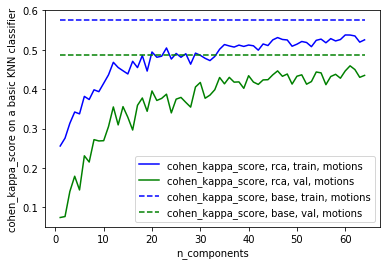

In [56]:
result=rca_result_m
plt.plot(result['param_range'], result['v_measure, train, m'], color="blue", label="cohen_kappa_score, rca, train, motions")
plt.plot(result['param_range'], result['v_measure, val, m'], color="green", label="cohen_kappa_score, rca, val, motions")
plt.plot(result['param_range'], result['v_measure, base, train, m'], color="blue", label="cohen_kappa_score, base, train, motions", linestyle="--")
plt.plot(result['param_range'], result['v_measure, base, val, m'], color="green", label="cohen_kappa_score, base, val, motions", linestyle="--")

plt.legend()
plt.ylabel("cohen_kappa_score on a basic KNN classifier")
plt.xlabel(param_name)
plt.show()

working on param = 1


working on param = 2


working on param = 3


working on param = 4


working on param = 5


working on param = 6


working on param = 7


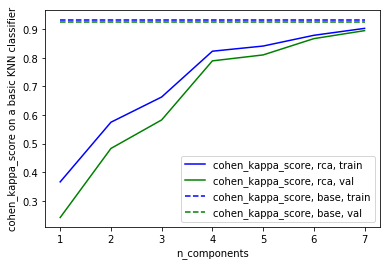

In [52]:

model_type = 'random projection'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = range(1, 8)
other_params = {} #{'n_clusters':4}
result = defaultdict(list)
for param in param_range:
    params = {param_name: param}
    rca_model = GaussianRandomProjection(**params, **other_params)
    t0 = time.time()
    
    result['fit time'].append(time.time()-t0)
    result['components'].append(model.components_)
    result['model params'].append(model.get_params())
    #result['score, train, m'].append(model.score(X_train_m))
    #result['score, val, m'].append(model.score(X_val_m))
    
    rca_model.fit(X_train_p)
    X_train_rca = rca_model.transform(X_train_p)
    X_val_rca = rca_model.transform(X_val_p)
    #assess accuracy
    knn = KNeighborsClassifier(n_neighbors=10)
    knn_base = KNeighborsClassifier(n_neighbors=10)
    knn_base.fit(X_train_p, y_train_p)
    knn.fit(X_train_rca, y_train_p)
    y_train_base_pred = knn_base.predict(X_train_p)
    y_val_base_pred = knn_base.predict(X_val_p)
    y_train_pred = knn.predict(X_train_rca)
    y_val_pred = knn.predict(X_val_rca)
    print("working on param = {}".format(param))
    result['v_measure, train, p'].append(cohen_kappa_score(y_train_pred, y_train_p))
    result['v_measure, val, p'].append(cohen_kappa_score(y_val_pred, y_val_p))
    result['v_measure, base, train, p'].append(cohen_kappa_score(y_train_base_pred, y_train_p))
    result['v_measure, base, val, p'].append(cohen_kappa_score(y_val_base_pred, y_val_p))
    #result['score, train, m'].append(model.score(X_train_m))
    #result['score, val, m'].append(model.score(X_val_m))

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type

rca_result_p = result

result=rca_result_p
plt.plot(result['param_range'], result['v_measure, train, p'], color="blue", label="cohen_kappa_score, rca, train")
plt.plot(result['param_range'], result['v_measure, val, p'], color="green", label="cohen_kappa_score, rca, val")
plt.plot(result['param_range'], result['v_measure, base, train, p'], color="blue", label="cohen_kappa_score, base, train", linestyle="--")
plt.plot(result['param_range'], result['v_measure, base, val, p'], color="green", label="cohen_kappa_score, base, val", linestyle="--")
plt.legend()
plt.ylabel("cohen_kappa_score on a basic KNN classifier")
plt.xlabel(param_name)
plt.show()


In [174]:
rca_m = GaussianRandomProjection(n_components=64)
rca_p = GaussianRandomProjection(n_components=7)

X_rca_m = rca_m.fit_transform(X_train_m)
X_rca_p = rca_p.fit_transform(X_train_p)
X_val_rca_m = rca_m.transform(X_val_m)
X_val_rca_p = rca_p.transform(X_val_p)

rca_m_data = [X_rca_m, X_val_rca_m, rca_m]
rca_p_data = [X_rca_p, X_val_rca_p, rca_p]

np.save('rca_m_data', rca_m_data)
np.save('rca_p_data', rca_p_data)

In [5]:

model_type = 't-sne'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = range(1,4)
other_params = {} #{'n_clusters':4}
result = defaultdict(list)
i = 1
for param in param_range:
    params={param_name:param}
    model = TSNE(**params, **other_params)
    t0 = time.time()
    fitted = model.fit_transform(X_train_m)
    result['fit time'].append(time.time()-t0)
    print("param number {}, fit-time: {}".format(i, time.time()-t0))
    i = i + 1
    result['model params'].append(model.get_params())
    result['kl_divergence'].append(model.kl_divergence_)
    #result['score, val, m'].append(model.score(X_val_m))

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type

tsne_result_m1 = result
np.save('tsne_result_m1', tsne_result_m1)

param number 1, fit-time: 63.39924907684326


param number 2, fit-time: 190.87018609046936


param number 3, fit-time: 969.0099756717682


In [11]:

model_type = 't-sne'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = range(1,4)
other_params = {} #{'n_clusters':4}
result = defaultdict(list)
i = 0
for param in param_range:
    params={param_name:param}
    model = TSNE(**params, **other_params)
    t0 = time.time()
    fitted = model.fit_transform(X_train_p)
    result['fit time'].append(time.time()-t0)
    i = i + 1
    print(i)
    result['model params'].append(model.get_params())
    result['kl_divergence'].append(model.kl_divergence_)
    #result['score, val, m'].append(model.score(X_val_m))

#result['explained variance ratio']=model.explained_variance_ratio_
#result['explained variance']=model.explained_variance_
result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type

tsne_result_p1 = result
np.save('tsne_result_p1', tsne_result_p1)

1


2


3


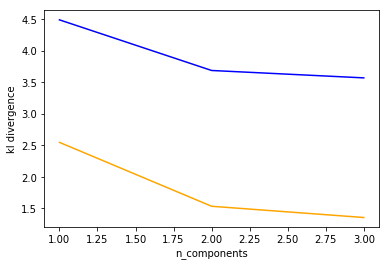

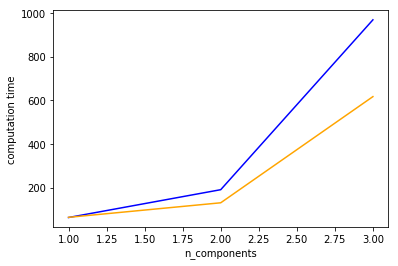

In [11]:
plot_result1 = tsne_result_m1
plot_result2 = tsne_result_p1
plt.plot(plot_result1['param_range'], plot_result1['kl_divergence'], color='blue')
plt.plot(plot_result2['param_range'], plot_result2['kl_divergence'], color='orange')
plt.ylabel('kl divergence')
plt.xlabel('n_components')
plt.show()
plt.plot(plot_result1['param_range'], plot_result1['fit time'], color='blue')
plt.plot(plot_result2['param_range'], plot_result2['fit time'], color='orange')
plt.ylabel('computation time')
plt.xlabel('n_components')
plt.show()

In [13]:

model_type = 't-sne'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = [2]
other_params = {} #{'n_clusters':4}
result = defaultdict(list)
i = 1
for param in param_range:
    params={param_name:param}
    model = TSNE(**params, **other_params)
    t0 = time.time()
    fitted = model.fit_transform(X_train_m)
    result['fit time'].append(time.time()-t0)
    print("param number {}, fit-time: {}".format(i, time.time()-t0))
    i = i + 1
    result['model params'].append(model.get_params())
    result['kl_divergence'].append(model.kl_divergence_)
    result['fitted'].append(fitted)
    result['embedding'].append(model.embedding_)

result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type

tsne_result_m2 = result
np.save('tsne_result_m2', tsne_result_m2)

param number 1, fit-time: 142.28599977493286


In [15]:

model_type = 't-sne'       #'kmeans' or 'gaussian mixture'
param_name = 'n_components'   #we need to use proper names now... 
param_range = [2]
other_params = {} #{'n_clusters':4}
result = defaultdict(list)
i = 1
for param in param_range:
    params={param_name:param}
    model = TSNE(**params, **other_params)
    t0 = time.time()
    fitted = model.fit_transform(X_train_p)
    result['fit time'].append(time.time()-t0)
    print("param number {}, fit-time: {}".format(i, time.time()-t0))
    i = i + 1
    result['model params'].append(model.get_params())
    result['kl_divergence'].append(model.kl_divergence_)
    result['fitted'].append(fitted)
    result['embedding'].append(model.embedding_)

result['param_range']=param_range
result['param_name']=param_name
result['model_type']=model_type

tsne_result_p2 = result
np.save('tsne_result_p2', tsne_result_p2)

param number 1, fit-time: 132.63299989700317


In [28]:
plot_result1['fitted'][0][:,1].shape

(7473,)

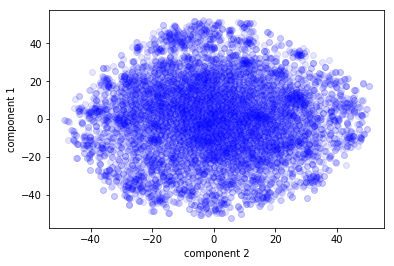

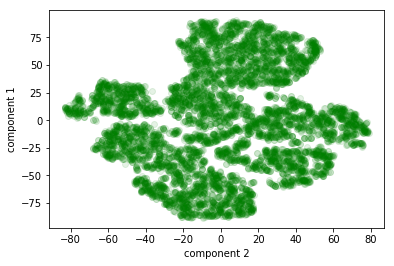

In [35]:
plot_result1 = tsne_result_m2
plot_result2 = tsne_result_p2
plt.scatter(plot_result1['fitted'][0][:,0], plot_result1['fitted'][0][:,1], color='blue', alpha=0.1)
plt.ylabel('component 1')
plt.xlabel('component 2')
plt.show()

plt.scatter(plot_result2['fitted'][0][:,0], plot_result2['fitted'][0][:,1], color='green', alpha=0.1)
plt.ylabel('component 1')
plt.xlabel('component 2')
plt.show()

In [123]:

model_type = 't-sne'       #'kmeans' or 'gaussian mixture'
param_name = 'learning_rate'   #we need to use proper names now... 
param_range = [50*(i+1) for i in range(19)]
other_params = {'n_components': 3, 'metric': 'cosine'} #{'n_clusters':4}
results = defaultdict(list)
i = 1
for run in range(4):
    result = defaultdict(list)
    print("Run #{}".format(run))
    for param in param_range:
        params={param_name:param}
        model = TSNE(**params, **other_params)
        t0 = time.time()
        fitted = model.fit_transform(X_train_m)
        result['fit time'].append(time.time()-t0)
        print("param number {}, fit-time: {}".format(i, time.time()-t0))
        i = i + 1
        result['model params'].append(model.get_params())
        result['fitted'].append(fitted)
        result['kl_divergence'].append(model.kl_divergence_)
    results[run] = result

results['param_range'] = param_range
results['param_name'] = param_name
results['model_type'] = model_type

tsne_result_m6 = results
np.save('tsne_result_m6', tsne_result_m6)

Run #0


param number 1, fit-time: 109.06299996376038


param number 2, fit-time: 100.31299996376038


param number 3, fit-time: 101.57699990272522


param number 4, fit-time: 96.98800015449524


param number 5, fit-time: 104.10900020599365


param number 6, fit-time: 99.63699984550476


param number 7, fit-time: 180.93600010871887


param number 8, fit-time: 127.20300006866455


param number 9, fit-time: 192.89599990844727


param number 10, fit-time: 144.73799991607666


param number 11, fit-time: 143.02300000190735


param number 12, fit-time: 131.10800004005432


param number 13, fit-time: 129.08200025558472


param number 14, fit-time: 161.84999990463257


param number 15, fit-time: 133.4469997882843


param number 16, fit-time: 152.31499981880188


param number 17, fit-time: 226.92200016975403


param number 18, fit-time: 120.82499980926514


param number 19, fit-time: 135.11100006103516
Run #1


param number 20, fit-time: 96.01100015640259


param number 21, fit-time: 79.84400010108948


param number 22, fit-time: 82.08699989318848


param number 23, fit-time: 81.71200013160706


param number 24, fit-time: 83.73099994659424


param number 25, fit-time: 82.60500025749207


param number 26, fit-time: 117.67399978637695


param number 27, fit-time: 94.2649998664856


param number 28, fit-time: 111.06900000572205


param number 29, fit-time: 130.3199999332428


param number 30, fit-time: 127.40700006484985


param number 31, fit-time: 123.66700005531311


param number 32, fit-time: 115.03500008583069


param number 33, fit-time: 155.0590000152588


param number 34, fit-time: 113.33700013160706


param number 35, fit-time: 153.94600009918213


param number 36, fit-time: 110.68600010871887


param number 37, fit-time: 143.28999972343445


param number 38, fit-time: 111.9150002002716
Run #2


param number 39, fit-time: 80.65900015830994


param number 40, fit-time: 81.10699987411499


param number 41, fit-time: 82.46699976921082


param number 42, fit-time: 82.83399987220764


param number 43, fit-time: 83.28600001335144


param number 44, fit-time: 92.13900017738342


param number 45, fit-time: 161.92499995231628


param number 46, fit-time: 92.87599992752075


param number 47, fit-time: 208.13399982452393


param number 48, fit-time: 142.621000289917


param number 49, fit-time: 130.12700009346008


param number 50, fit-time: 121.43600010871887


param number 51, fit-time: 121.4359998703003


param number 52, fit-time: 147.73200011253357


param number 53, fit-time: 142.2370002269745


param number 54, fit-time: 143.28799986839294


param number 55, fit-time: 115.03200006484985


param number 56, fit-time: 121.64300012588501


param number 57, fit-time: 108.52099990844727
Run #3


param number 58, fit-time: 86.19799995422363


param number 59, fit-time: 81.25499987602234


param number 60, fit-time: 83.00200033187866


param number 61, fit-time: 81.57400012016296


param number 62, fit-time: 83.24699997901917


param number 63, fit-time: 91.73200011253357


param number 64, fit-time: 118.63899993896484


param number 65, fit-time: 95.3140001296997


param number 66, fit-time: 117.88499999046326


param number 67, fit-time: 127.57500004768372


param number 68, fit-time: 125.6159999370575


param number 69, fit-time: 122.17700004577637


param number 70, fit-time: 160.74999976158142


param number 71, fit-time: 124.54300022125244


param number 72, fit-time: 121.26200008392334


param number 73, fit-time: 119.94599986076355


param number 74, fit-time: 131.97499990463257


param number 75, fit-time: 119.15999984741211


param number 76, fit-time: 110.63499975204468


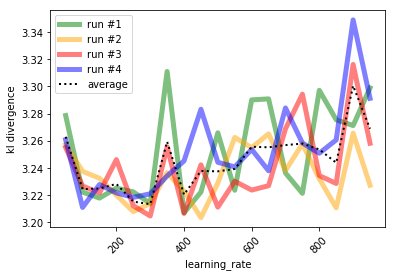

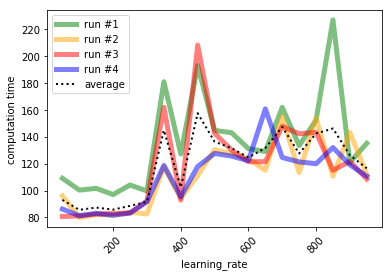

In [128]:
results = np.load('tsne_result_m6.npy').item()
colors = ['green', 'orange', 'red', 'blue']

all_array=[]
for run in range(4):
    plot_result1 = results[run]
    plt.plot(results['param_range'],plot_result1['kl_divergence'], 
             color=colors[run], alpha=0.5, linewidth=5.0, label="run #{}".format(run+1))
    all_array.append(plot_result1['kl_divergence'])
plt.plot(results['param_range'], np.mean(all_array, axis=0), 
         color='black', linewidth=2, linestyle=":", label="average")
plt.ylabel('kl divergence')
plt.xlabel(results['param_name'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

all_array=[]
for run in range(4):
    plot_result1 = results[run]
    plt.plot(results['param_range'], plot_result1['fit time'], 
             color=colors[run], alpha=0.5, linewidth=5.0, label="run #{}".format(run+1))
    all_array.append(plot_result1['fit time'])
plt.plot(results['param_range'], np.mean(all_array, axis=0), 
         color='black', linewidth=2, linestyle=":", label="average")
plt.ylabel('computation time')
plt.xlabel(results['param_name'])
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [93]:
tsne_results_temp2 = tsne_result_m4[0]['fit time']
all_temp = tsne_results_temp

#print(tsne_results_temp)
#print(all_temp)
#all_temp = results[0]['fit time']
#len(all_temp)

res1 = tsne_results_temp2[0:10]
res2 = tsne_results_temp2[10:20]
res3 = tsne_results_temp2[20:30]
res4 = tsne_results_temp2[30:40]

plot_time = []
plot_time.append(res1)
plot_time.append(res2)
plot_time.append(res3)
plot_time.append(res4)

print(all_temp[0:10])
print(all_temp[10:20])

[3.772732734680176, 3.715594530105591, 3.6803927421569824, 3.7153635025024414, 3.749452829360962, 3.7093474864959717, 3.708876848220825, 3.7325196266174316, 3.7423179149627686, 3.8092613220214844]
[3.7530505657196045, 3.6799840927124023, 3.7048258781433105, 3.707075595855713, 3.693028688430786, 3.7031803131103516, 3.7178008556365967, 3.720078468322754, 3.7011520862579346, 3.7872366905212402]


In [175]:
distance_metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 
                    'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 
                    'jaccard', 'kulsinski', 'matching', 'minkowski', 
                    'rogerstanimoto', 'russellrao', 'sokalmichener', 
                    'sokalsneath', 'sqeuclidean']

In [176]:
model_type = 't-sne'       #'kmeans' or 'gaussian mixture'
param_name = 'metric'   #we need to use proper names now... 
param_range = distance_metrics
other_params = {'n_components': 2, 'learning_rate': 300} #{'n_clusters':4}
results = defaultdict(list)
i = 0
for run in range(4):
    result = defaultdict(list)
    print("Run #{}".format(run))
    for param in param_range:
        params={param_name:param}
        model = TSNE(**params, **other_params)
        t0 = time.time()
        fitted = model.fit_transform(X_train_m)
        result['fit time'].append(time.time()-t0)
        print("param number {}, fit-time: {}".format(i, time.time()-t0))
        i = i + 1
        result['model params'].append(model.get_params())
        result['fitted'].append(fitted)
        result['kl_divergence'].append(model.kl_divergence_)
    results[run] = result

results['param_range']=param_range
results['param_name']=param_name
results['model_type']=model_type

tsne_result_m5 = results
np.save('tsne_result_m5', tsne_result_m5)

Run #0


param number 0, fit-time: 476.4042024612427


KeyboardInterrupt: 

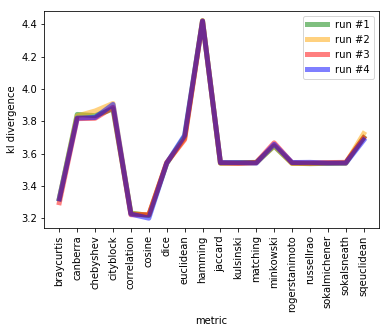

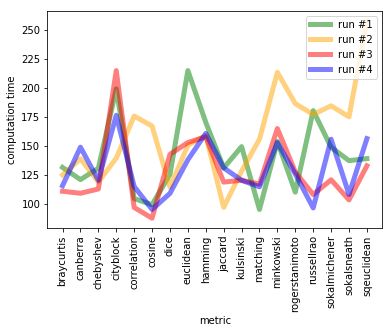

In [ ]:
results = np.load('tsne_result_m5.npy').item()
colors = ['green', 'orange', 'red', 'blue']

for run in range(4):
    plot_result1 = results[run]
    plt.plot(results['param_range'],plot_result1['kl_divergence'], 
             color=colors[run], alpha=0.5, linewidth=5.0, label="run #{}".format(run+1))
#plt.plot(results['param_range'], np.mean(np.array(plot_result1['kl_divergence']), axis=0), 
#         color='black', linewidth=2, linestyle=":", label="average")
plt.ylabel('kl divergence')
plt.xlabel(results['param_name'])
plt.xticks(rotation=90)
plt.legend()
plt.show()
for run in range(4):
    plot_result1 = results[run]
    plt.plot(results['param_range'], plot_result1['fit time'], 
             color=colors[run], alpha=0.5, linewidth=5.0, label="run #{}".format(run+1))
#plt.plot(results['param_range'], np.mean(np.array(plot_result1['fit time']), axis=0), 
#         color='black', linewidth=2, linestyle=":", label="average")
plt.ylabel('computation time')
plt.xlabel(results['param_name'])
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [182]:
distance_metrics2 = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 
                     'dice', 'euclidean', 'hamming', #'cosine',  'correlation', 
                    'jaccard', 'kulsinski', 'matching', 'minkowski', 
                    'rogerstanimoto', 'russellrao', 'sokalmichener']

model_type = 't-sne'       #'kmeans' or 'gaussian mixture'
param_name = 'metric'   #we need to use proper names now... 
param_range = distance_metrics2
other_params = {'n_components': 2, 'learning_rate': 300} #{'n_clusters':4}
results = defaultdict(list)
i = 0
for run in range(4):
    result = defaultdict(list)
    print("Run #{}".format(run))
    for param in param_range:
        params={param_name:param}
        model = TSNE(**params, **other_params)
        t0 = time.time()
        fitted = model.fit_transform(X_train_p)
        result['fit time'].append(time.time()-t0)
        print("param number {}, fit-time: {}".format(i, time.time()-t0))
        i = i + 1
        result['model params'].append(model.get_params())
        result['fitted'].append(fitted)
        result['kl_divergence'].append(model.kl_divergence_)
    results[run] = result

results['param_range']=param_range
results['param_name']=param_name
results['model_type']=model_type

tsne_result_p5 = results
np.save('tsne_result_p5', tsne_result_p5)

Run #0


param number 0, fit-time: 118.353200674057


param number 1, fit-time: 113.01440048217773


param number 2, fit-time: 116.57480049133301


param number 3, fit-time: 110.06760048866272


param number 4, fit-time: 177.18500089645386


param number 5, fit-time: 123.83340072631836


param number 6, fit-time: 143.83300065994263


param number 7, fit-time: 140.57900094985962


param number 8, fit-time: 131.08740043640137


param number 9, fit-time: 269.773401260376


param number 10, fit-time: 111.38500046730042


param number 11, fit-time: 143.9296007156372


param number 12, fit-time: 127.58980083465576


param number 13, fit-time: 99.05000042915344
Run #1


param number 14, fit-time: 111.80260062217712


param number 15, fit-time: 139.09760093688965


param number 16, fit-time: 131.92280077934265


param number 17, fit-time: 129.5974006652832


param number 18, fit-time: 105.06680035591125


param number 19, fit-time: 112.32800078392029


param number 20, fit-time: 132.37500071525574


param number 21, fit-time: 143.11960101127625


param number 22, fit-time: 138.10560059547424


param number 23, fit-time: 98.24240064620972


param number 24, fit-time: 103.66740036010742


param number 25, fit-time: 135.92000079154968


param number 26, fit-time: 304.3100016117096


param number 27, fit-time: 118.98820066452026
Run #2


param number 28, fit-time: 122.76480078697205


param number 29, fit-time: 141.6324007511139


param number 30, fit-time: 117.29780077934265


param number 31, fit-time: 106.02840042114258


param number 32, fit-time: 126.05860090255737


param number 33, fit-time: 103.0814003944397


param number 34, fit-time: 150.21160101890564


param number 35, fit-time: 142.64900064468384


param number 36, fit-time: 143.17640089988708


param number 37, fit-time: 124.478200674057


param number 38, fit-time: 133.0974006652832


param number 39, fit-time: 183.6340012550354


param number 40, fit-time: 141.75140070915222


param number 41, fit-time: 137.3518009185791
Run #3


param number 42, fit-time: 120.21240043640137


param number 43, fit-time: 123.98340082168579


param number 44, fit-time: 108.98680067062378


param number 45, fit-time: 122.63760042190552


param number 46, fit-time: 137.98660111427307


param number 47, fit-time: 120.86240029335022


param number 48, fit-time: 139.47980093955994


param number 49, fit-time: 100.94620060920715


param number 50, fit-time: 177.29140090942383


param number 51, fit-time: 131.52980089187622


param number 52, fit-time: 121.8494005203247


param number 53, fit-time: 141.85720086097717


param number 54, fit-time: 182.42480063438416


param number 55, fit-time: 139.2788007259369


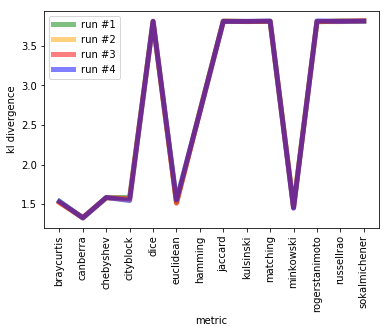

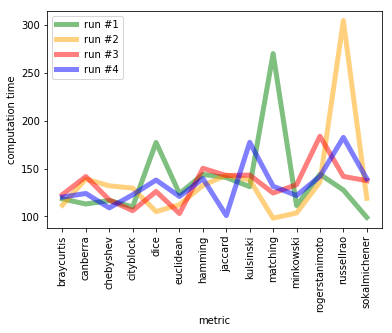

In [183]:
results = np.load('tsne_result_p5.npy').item()
colors = ['green', 'orange', 'red', 'blue']

for run in range(4):
    plot_result1 = results[run]
    plt.plot(results['param_range'],plot_result1['kl_divergence'], 
             color=colors[run], alpha=0.5, linewidth=5.0, label="run #{}".format(run+1))
#plt.plot(results['param_range'], np.mean(np.array(plot_result1['kl_divergence']), axis=0), 
#         color='black', linewidth=2, linestyle=":", label="average")
plt.ylabel('kl divergence')
plt.xlabel(results['param_name'])
plt.xticks(rotation=90)
plt.legend()
plt.show()
for run in range(4):
    plot_result1 = results[run]
    plt.plot(results['param_range'], plot_result1['fit time'], 
             color=colors[run], alpha=0.5, linewidth=5.0, label="run #{}".format(run+1))
#plt.plot(results['param_range'], np.mean(np.array(plot_result1['fit time']), axis=0), 
#         color='black', linewidth=2, linestyle=":", label="average")
plt.ylabel('computation time')
plt.xlabel(results['param_name'])
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [184]:
print("ok erica, now update the distance metric and run the next particles t-sne to tune learning rate")

ok erica, now update the distance metric and run the next particles t-sne to tune learning rate


In [192]:

model_type = 't-sne'       #'kmeans' or 'gaussian mixture'
param_name = 'learning_rate'   #we need to use proper names now... 
param_range = [100*(2*i+1) for i in range(9)]
other_params = {'n_components': 2, 'metric': 'canberra'} #{'n_clusters':4}
results = defaultdict(list)
i = 1
for run in range(3):
    result = defaultdict(list)
    print("Run #{}".format(run))
    for param in param_range:
        params={param_name:param}
        model = TSNE(**params, **other_params)
        t0 = time.time()
        fitted = model.fit_transform(X_train_p)
        result['fit time'].append(time.time()-t0)
        print("param number {}, fit-time: {}".format(i, time.time()-t0))
        i = i + 1
        result['model params'].append(model.get_params())
        result['fitted'].append(fitted)
        result['kl_divergence'].append(model.kl_divergence_)
    results[run] = result

results['param_range'] = param_range
results['param_name'] = param_name
results['model_type'] = model_type

tsne_result_p6 = results
np.save('tsne_result_p6', tsne_result_p6)

Run #0


param number 1, fit-time: 171.52420091629028


param number 2, fit-time: 180.00120043754578


param number 3, fit-time: 157.88060069084167


param number 4, fit-time: 190.11620092391968


param number 5, fit-time: 189.3686008453369


param number 6, fit-time: 225.72320103645325


param number 7, fit-time: 186.56560111045837


param number 8, fit-time: 194.9628005027771


param number 9, fit-time: 202.6839997768402
Run #1


param number 10, fit-time: 141.78200006484985


param number 11, fit-time: 186.06180000305176


param number 12, fit-time: 202.9656002521515


param number 13, fit-time: 150.935400724411


param number 14, fit-time: 177.6488003730774


param number 15, fit-time: 192.72460007667542


param number 16, fit-time: 172.4738004207611


param number 17, fit-time: 175.72800016403198


param number 18, fit-time: 210.29999995231628
Run #2


param number 19, fit-time: 214.11499977111816


param number 20, fit-time: 173.60300016403198


param number 21, fit-time: 176.13199996948242


param number 22, fit-time: 182.38499999046326


param number 23, fit-time: 188.95099997520447


param number 24, fit-time: 157.82200002670288


param number 25, fit-time: 170.58199977874756


param number 26, fit-time: 181.30900025367737


param number 27, fit-time: 195.2279999256134


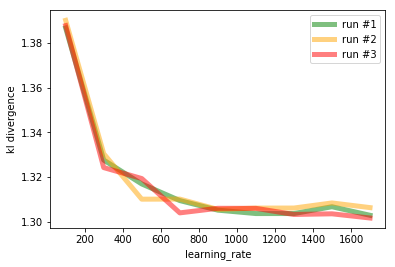

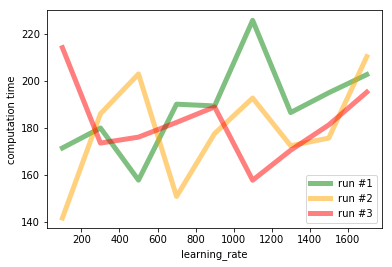

In [197]:
results = np.load('tsne_result_p6.npy').item()
colors = ['green', 'orange', 'red', 'blue']

for run in range(3):
    plot_result1 = results[run]
    plt.plot(results['param_range'], plot_result1['kl_divergence'], 
             color=colors[run], alpha=0.5, linewidth=5.0, label="run #{}".format(run+1))
#plt.plot(results['param_range'], np.mean(np.array(plot_result1['kl_divergence']), axis=0), 
#         color='black', linewidth=2, linestyle=":", label="average")
plt.ylabel('kl divergence')
plt.xlabel(results['param_name'])
plt.xticks()
plt.legend()
plt.show()
for run in range(3):
    plot_result1 = results[run]
    plt.plot(results['param_range'], plot_result1['fit time'], 
             color=colors[run], alpha=0.5, linewidth=5.0, label="run #{}".format(run+1))
#plt.plot(results['param_range'], np.mean(np.array(plot_result1['fit time']), axis=0), 
#         color='black', linewidth=2, linestyle=":", label="average")
plt.ylabel('computation time')
plt.xlabel(results['param_name'])
plt.xticks()
plt.legend()
plt.show()


In [ ]:
tsne_m = TSNE(n_components=2)
tsne_p = TSNE(n_components=2)
X_tsne_m = tsne_m.fit_transform(X_train_m)
X_tsne_p = tsne_p.fit_transform(X_train_p)

print(X_tsne_m.shape)
print(X_tsne_p.shape)

#X_val_tsne_m = tsne_m.fit_transform(X_val_m)
#X_val_tsne_p = tsne_p.fit(X_val_p)

#tsne_m_data = [X_tsne_m, X_val_tsne_m, tsne_m]
#tsne_p_data = [X_tsne_p, X_val_tsne_p, tsne_p]

#np.save('tsne_m_data', tsne_m_data)
#np.save('tsne_p_data', tsne_p_data)

In [200]:

model_type = 't-sne'       #'kmeans' or 'gaussian mixture'
param_name = 'perplexity'   #we need to use proper names now... 
param_range = [50, 60, 70, 80, 90, 100]
other_params = {'n_components': 2, 'metric': 'canberra', 'learning_rate': 1200, 'n_iter':2000} #{'n_clusters':4}
results = defaultdict(list)
i = 1
for run in range(3):
    result = defaultdict(list)
    print("Run #{}".format(run))
    for param in param_range:
        params={param_name:param}
        model = TSNE(**params, **other_params)
        t0 = time.time()
        fitted = model.fit_transform(X_train_p)
        result['fit time'].append(time.time()-t0)
        print("param number {}, fit-time: {}".format(i, time.time()-t0))
        i = i + 1
        result['model params'].append(model.get_params())
        result['fitted'].append(fitted)
        result['kl_divergence'].append(model.kl_divergence_)
    results[run] = result

results['param_range'] = param_range
results['param_name'] = param_name
results['model_type'] = model_type

tsne_result_p7 = results
np.save('tsne_result_p7', tsne_result_p7)

Run #0


param number 1, fit-time: 307.74954414367676


param number 2, fit-time: 393.59372305870056


param number 3, fit-time: 432.9787743091583


param number 4, fit-time: 417.91597270965576


param number 5, fit-time: 416.012850522995


param number 6, fit-time: 482.5900251865387
Run #1


param number 7, fit-time: 322.21024656295776


param number 8, fit-time: 335.6197044849396


param number 9, fit-time: 370.6958661079407


param number 10, fit-time: 429.2979633808136


param number 11, fit-time: 434.2145199775696


param number 12, fit-time: 473.67734384536743
Run #2


param number 13, fit-time: 369.9744951725006


param number 14, fit-time: 392.8264672756195


param number 15, fit-time: 318.8471930027008


param number 16, fit-time: 379.51576042175293


param number 17, fit-time: 380.6811909675598


param number 18, fit-time: 426.5064537525177


[1.1997641324996948,
 1.1863186359405518,
 1.165550708770752,
 1.1540544033050537,
 1.1489759683609009,
 1.1326544284820557]

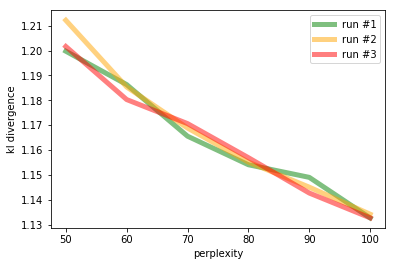

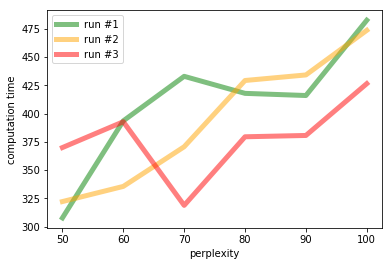

In [204]:
results = np.load('tsne_result_p7.npy').item()
colors = ['green', 'orange', 'red', 'blue']

#results['param_range']=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for run in range(3):
    plot_result1 = results[run]
    plt.plot(results['param_range'], plot_result1['kl_divergence'], 
             color=colors[run], alpha=0.5, linewidth=5.0, label="run #{}".format(run+1))
#plt.plot(results['param_range'], np.mean(np.array(plot_result1['kl_divergence']), axis=0), 
#         color='black', linewidth=2, linestyle=":", label="average")
plt.ylabel('kl divergence')
plt.xlabel(results['param_name'])
plt.xticks()
plt.legend()
plt.show()
for run in range(3):
    plot_result1 = results[run]
    plt.plot(results['param_range'], plot_result1['fit time'], 
             color=colors[run], alpha=0.5, linewidth=5.0, label="run #{}".format(run+1))
#plt.plot(results['param_range'], np.mean(np.array(plot_result1['fit time']), axis=0), 
#         color='black', linewidth=2, linestyle=":", label="average")
plt.ylabel('computation time')
plt.xlabel(results['param_name'])
plt.xticks()
plt.legend()
plt.show()


In [254]:
tsne_p7 = np.load('tsne_result_p7.npy')
x = tsne_p7.item()[0]['fitted'][5][:, 0]
y = tsne_p7.item()[0]['fitted'][5][:, 1]

color_vector = [color_list[int(i)] for i in y_train_p_int]

#plt.scatter(np.reshape(x, -1), np.reshape(y, -1), alpha=0.03, c=color_vector)



TypeError: only size-1 arrays can be converted to Python scalars

In [224]:
y_train_p_int = y_train_p

y_train_p_int[y_train_p == 'proton'] = 0
y_train_p_int[y_train_p == 'positron'] = 1
y_train_p_int[y_train_p == 'pion'] = 2
y_train_p_int[y_train_p == 'kaon'] = 3


array([0, 2, 0, ..., 2, 1, 1], dtype=object)

In [236]:
y_train_p_int = y_train_p_int.astype(int).reshape((1, -1))